In [228]:
import pandas as pd
import numpy as np
import mca
import matplotlib.pyplot as plt

In this example, I demonstrate the use of CA using the Cultural Module of the 1993 General Social Survey. 

In [130]:
df = pd.read_csv('35536-0001-Data.tsv', sep = '\t')

I make use of all questions relating to musical tastes and transform them into binary indicator variables. 

In [25]:
music_taste = df.iloc[:,362:379].copy()

In [65]:
music_ind = (music_taste <= 2) * 1

I also make use of all cultural experiene variables.

In [66]:
exp = df.iloc[:,380:394].copy()
exp_ind = (exp == 1) * 1

In [67]:
op = df.iloc[:,397:405].copy()
op_ind = (op <= 2) * 1

The musical tastes and cultural experience variables are not exactly categorical. To demonstrate how to incorporate a categoraical variable into CA, I also make use of the "favorite subject in high school" variable.

In [45]:
df['HSCLASS1'].value_counts()

 1     297
 9     295
 11    144
 0     141
-1     139
 8     134
 10    119
 3     112
 7      51
 12     50
 2      27
 15     26
 4      25
 5      23
 6      15
 99      7
 14      1
Name: HSCLASS1, dtype: int64

Based on the value coutns, I decide to recode -1, 99 and 14 all as 10 (Others).

In [50]:
fav = df[['HSCLASS1']].copy()
fav[fav.HSCLASS1 == -1] = 11
fav[fav.HSCLASS1 == 99] = 11
fav[fav.HSCLASS1 == 14] = 11

Next I generate dummy indicator variables out of the categorical variable.

In [230]:
hs_fav_ind = pd.get_dummies(fav.HSCLASS1)
hs_fav_ind.columns = ["NONE","ENGLISH, LITERATURE", 
                      "FOREIGN LANGUAGE",
                      "FINE ARTS",
                      "OTHER HUMANITIES",
                      "ECONOMICS",
                      "PSYCHOLOGY",
                      "GOVERNMENT-CIVICS",
                      "SOCIAL SCIENCE-OTHER SOCIAL STUDY",
                      "MATHEMATICS",
                      "SCIENCE",
                      "OTHER",
                      "BUSINESS",
                      "OTHER VOCATIONAL"]

Let's try to use the cultural indicators first.

In [231]:
I =  pd.concat([music_ind, exp_ind, op_ind],axis = 1)

Notice that you can easily procue a Burt matrix out of an indicator matrix. The Burt matrix can be basically thought of as a multidimensional crosstable. You can also perform CA on the Burt matrix instead of the Identity matrix.

In [232]:
B = I.T.dot(I)

In [233]:
B

BIGBAND  BLUGRASS  COUNTRY  BLUES  MUSICALS  CLASSICL  FOLK  GOSPEL  \
BIGBAND       857       460      551    572       585       517   460     531   
BLUGRASS      460       707      559    466       371       368   430     470   
COUNTRY       551       559      977    558       472       435   480     640   
BLUES         572       466      558    890       506       479   429     553   
MUSICALS      585       371      472    506       797       517   438     502   
CLASSICL      517       368      435    479       517       759   453     473   
FOLK          460       430      480    429       438       453   683     476   
GOSPEL        531       470      640    553       502       473   476     927   
JAZZ          521       373      455    632       487       461   379     479   
LATIN         298       218      247    292       275       289   246     265   
MOODEASY      588       572      645    581       533       502   495     592   
NEWAGE        129       116      124    163       128       155   135     105   
OPERA         250       158      188    224       255       293   204     221   
RAP            87        79      118    144       110        93    67     124   
REGGAE        252       218      237    347       249       255   204     249   
CONROCK       444       362      523    546       450       405   351     431   
OLDIES        593       511      710    679       578       525   484     607   
ATTSPRTS      473       359      510    516       459       436   365     453   
VISITART      403       286      338    403       394       433   317     339   
MAKEART       376       295      396    362       369       373   301     371   
AUTORACE      105       121      173    141        80        96    95     132   
CAMPING       358       329      396    400       325       351   323     329   
GARDEN        572       472      631    537       526       513   473     571   
DANCE         204       133      165    203       230       227   152     170   
GOMUSIC       185       108      124    159       191       211   144     131   
HUNTFISH      292       283      408    314       217       244   249     313   
PERFORM        95        56       83     92        91        99    73      95   
DOSPORTS      481       386      529    549       466       466   380     468   
SEEMOVIE      607       457      647    662       596       573   460     594   
USEVCR        503       390      574    543       495       450   394     502   
PLYMUSIC      224       182      207    227       214       245   190     222   
JUDGEART      385       315      478    398       360       313   302     434   
TRSTPROF      526       427      604    554       488       450   402     535   
CLASSICS      254       224      361    277       230       198   196     332   
GRTBOOKS      621       494      685    648       587       565   502     628   
MODPAINT      315       276      404    304       287       253   246     353   
ENGLISH       398       324      450    379       366       346   313     403   
PCLIT         531       433      604    528       494       463   413     543   
EXCELART      773       629      846    814       727       693   612     794   

          JAZZ  LATIN  ...  USEVCR  PLYMUSIC  JUDGEART  TRSTPROF  CLASSICS  \
BIGBAND    521    298  ...     503       224       385       526       254   
BLUGRASS   373    218  ...     390       182       315       427       224   
COUNTRY    455    247  ...     574       207       478       604       361   
BLUES      632    292  ...     543       227       398       554       277   
MUSICALS   487    275  ...     495       214       360       488       230   
CLASSICL   461    289  ...     450       245       313       450       198   
FOLK       379    246  ...     394       190       302       402       196   
GOSPEL     479    265  ...     502       222       434       535       332   
JAZZ       794    290  ...     503       214       335       481   

Now, let's perform CA.

In [221]:
model = mca.MCA(I, benzecri=False)

Screeplot:

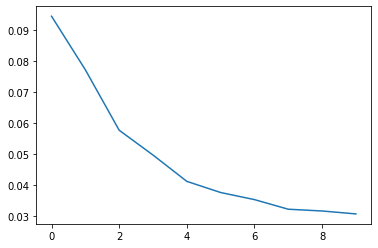

In [224]:
plt.plot(model.L[:10]/model.L.sum())

Scatter Plot of the column scores. 

In [234]:
row_scores = model.fs_r(N=5)
col_scores = model.fs_c(N=5)

In [235]:
col_df = pd.DataFrame(col_scores, index = I.columns)

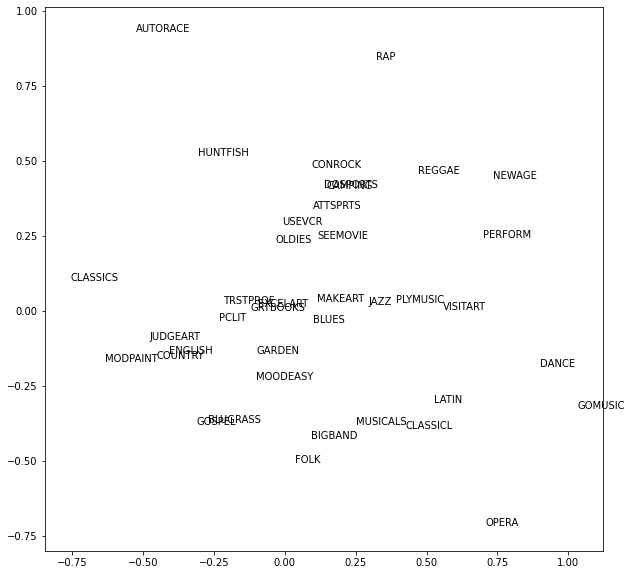

In [237]:
# dim1 vs dim2
plt.figure(figsize = [10,10])
plt.scatter(col_df[0], col_df[1], alpha = 0)
for i, var in enumerate(col_df.index):
    plt.text(col_df.iloc[i,0], col_df.iloc[i,1], var)

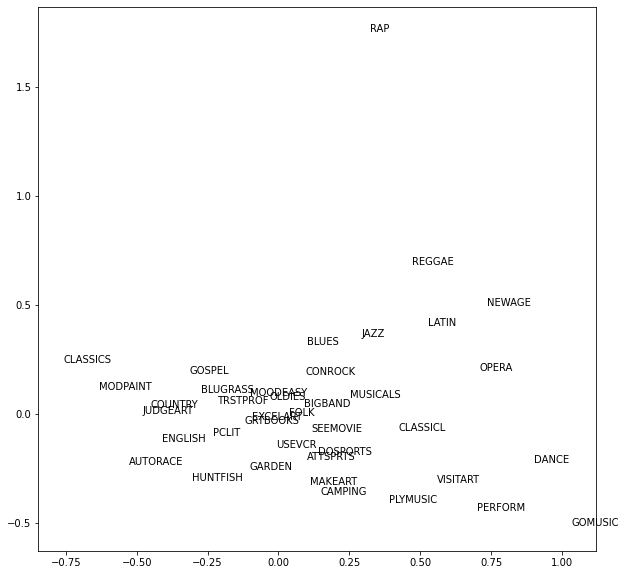

In [238]:
#dim1 vs dim3
plt.figure(figsize = [10,10])
plt.scatter(col_df[0], col_df[2], alpha = 0)
for i, var in enumerate(col_df.index):
    plt.text(col_df.iloc[i,0], col_df.iloc[i,2], var)

Then, let's try to include the high-school subject indicators.

In [239]:
I =  pd.concat([music_ind, exp_ind, op_ind, hs_fav_ind],axis = 1)
B = I.T.dot(I)

In [240]:
I.shape

(1606, 53)

In [241]:
hs_fav_ind.shape

(1606, 14)

Notices that the last 14 variables are actually generated out of one single variable. So we need to make some correction.

In [242]:
model = mca.MCA(I, ncols = 53-14+1)

In [243]:
row_scores = model.fs_r(N=3)
col_scores = model.fs_c(N=3)
col_df = pd.DataFrame(col_scores, index = I.columns)

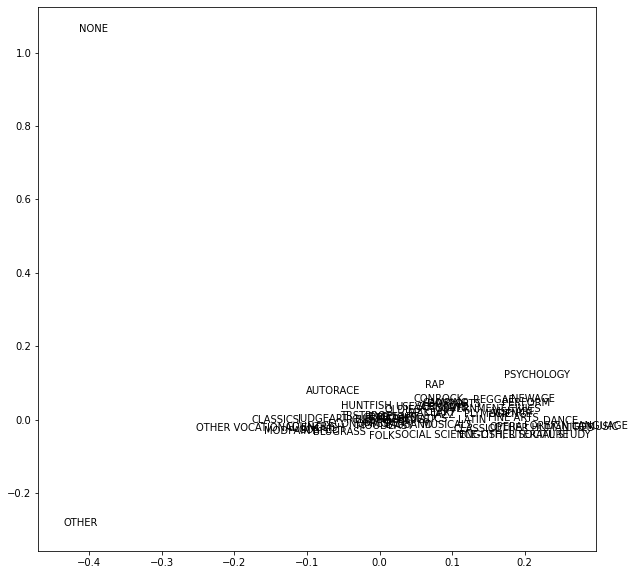

In [244]:
plt.figure(figsize = (10,10))
plt.scatter(col_df[0], col_df[1], alpha = 0)
for i, var in enumerate(col_df.index):
    plt.text(col_df.iloc[i,0], col_df.iloc[i,1], var)
plt.show()

It looks like the seond dimension is primarily driven by subjects NONE and OTHER, which are not very interesting. Let's drop these subjects along with individuals who selected those subjects.

In [245]:
I1 = I[(fav.HSCLASS1 != 0) & (fav.HSCLASS1 != 10) & (fav.HSCLASS1 != 7) & (fav.HSCLASS1 != 6)].drop(['NONE', 'OTHER', 'GOVERNMENT-CIVICS', 'PSYCHOLOGY'], axis = 1)

In [246]:
model = mca.MCA(I1, ncols = 53-14+1)

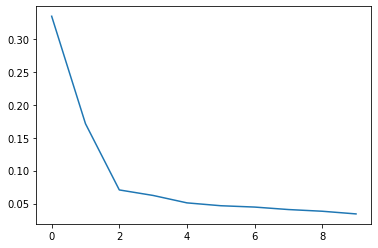

In [247]:
eigenvalues = model.L
plt.plot(eigenvalues[:10]/eigenvalues.sum())

In [248]:
row_scores = model.fs_r(N=3)
col_scores = model.fs_c(N=3)
col_df = pd.DataFrame(col_scores, index = I1.columns)

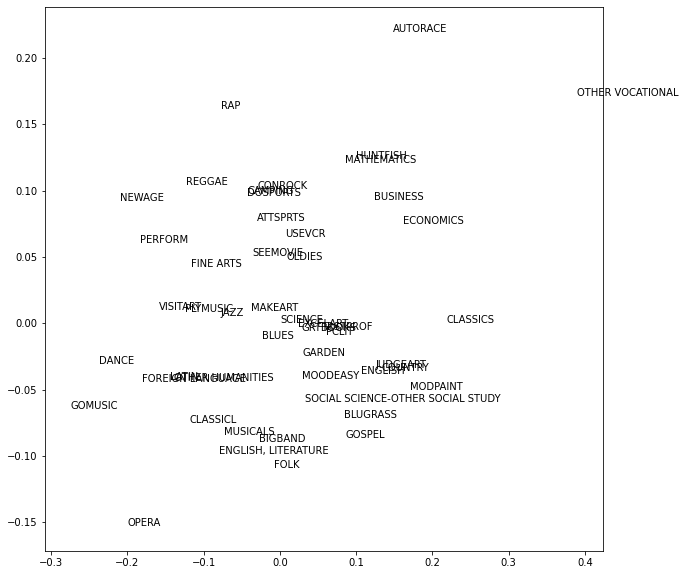

In [249]:
plt.figure(figsize = (10,10))
plt.scatter(col_df[0], col_df[1], alpha = 0)
for i, var in enumerate(col_df.index):
    plt.text(col_df.iloc[i,0], col_df.iloc[i,1], var)
plt.show()

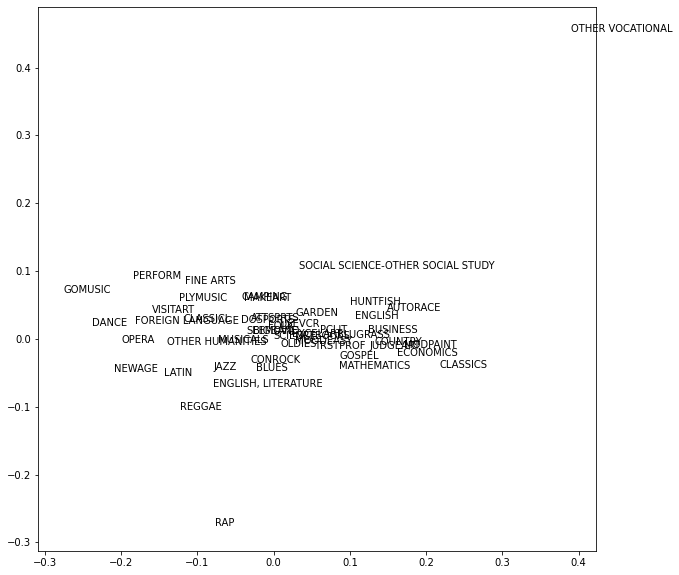

In [250]:
plt.figure(figsize = (10,10))
plt.scatter(col_df[0], col_df[2], alpha = 0)
for i, var in enumerate(col_df.index):
    plt.text(col_df.iloc[i,0], col_df.iloc[i,2], var)

It looks like the third dimension is still largely driven by only one single variable: OTHER VOCATIONAL. We might consider dropping it as well in the next round. 

In [194]:
I.to_csv('gss_culture_indicator.csv')